# Manual Freature Engineering

In [1]:
import featuretools as ft
import numpy as np
import pandas as pd

data = ft.demo.load_mock_customer()
data

{'customers':    customer_id zip_code           join_date date_of_birth
 0            1    60091 2011-04-17 10:48:33    1994-07-18
 1            2    13244 2012-04-15 23:31:04    1986-08-18
 2            3    13244 2011-08-13 15:42:34    2003-11-21
 3            4    60091 2011-04-08 20:08:14    2006-08-15
 4            5    60091 2010-07-17 05:27:50    1984-07-28,
 'products':   product_id brand
 0          1     B
 1          2     B
 2          3     B
 3          4     B
 4          5     A,
 'sessions':     session_id  customer_id   device       session_start
 0            1            2  desktop 2014-01-01 00:00:00
 1            2            5   mobile 2014-01-01 00:17:20
 2            3            4   mobile 2014-01-01 00:28:10
 3            4            1   mobile 2014-01-01 00:44:25
 4            5            4   mobile 2014-01-01 01:11:30
 5            6            1   tablet 2014-01-01 01:23:25
 6            7            3   tablet 2014-01-01 01:39:40
 7            8        

In [2]:
transactions = data['transactions']
sessions = data['sessions']
customers = data['customers']

In [3]:
transactions.head()

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54


In [4]:
sessions.head()

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30


In [5]:
customers.head()

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [6]:
customers['joined_day'] = customers['join_date'].dt.day
customers['joined_month'] = customers['join_date'].dt.month
customers['joined_year'] = customers['join_date'].dt.year
customers.head()

,customer_id,zip_code,join_date,date_of_birth,joined_day,joined_month,joined_year
0,1,60091,2011-04-17 10:48:33,1994-07-18,17,4,2011
1,2,13244,2012-04-15 23:31:04,1986-08-18,15,4,2012
2,3,13244,2011-08-13 15:42:34,2003-11-21,13,8,2011
3,4,60091,2011-04-08 20:08:14,2006-08-15,8,4,2011
4,5,60091,2010-07-17 05:27:50,1984-07-28,17,7,2010


In [17]:
transcations_and_sessions = transactions.merge(sessions,on='session_id',right_index=True,how='left')
transcations_and_sessions.head()

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start
0,298,1,2014-01-01 00:00:00,5,127.64,5.0,mobile,2014-01-01 00:17:20
1,2,1,2014-01-01 00:01:05,2,109.48,5.0,mobile,2014-01-01 00:17:20
2,308,1,2014-01-01 00:02:10,3,95.06,5.0,mobile,2014-01-01 00:17:20
3,116,1,2014-01-01 00:03:15,4,78.92,5.0,mobile,2014-01-01 00:17:20
4,371,1,2014-01-01 00:04:20,3,31.54,5.0,mobile,2014-01-01 00:17:20


In [18]:
grp = transcations_and_sessions.groupby('customer_id')['amount'].agg(['mean','max','min'])
grp.columns = ['mean transcation_amount','max transcation_amount','min transcation_amount']
grp.head()

,mean transcation_amount,max transcation_amount,min transcation_amount
customer_id,,,
1.0,75.148655,149.15,5.73
2.0,81.233134,146.81,5.81
3.0,82.132927,148.86,8.73
4.0,71.882439,149.95,6.29
5.0,71.155269,143.45,5.91


In [19]:
ss = customers.merge(grp,on='customer_id',right_index=True,how='left')
ss

,customer_id,zip_code,join_date,date_of_birth,joined_day,joined_month,joined_year,mean transcation_amount,max transcation_amount,min transcation_amount
0,1,60091,2011-04-17 10:48:33,1994-07-18,17,4,2011,81.233134,146.81,5.81
1,2,13244,2012-04-15 23:31:04,1986-08-18,15,4,2012,82.132927,148.86,8.73
2,3,13244,2011-08-13 15:42:34,2003-11-21,13,8,2011,71.882439,149.95,6.29
3,4,60091,2011-04-08 20:08:14,2006-08-15,8,4,2011,71.155269,143.45,5.91
4,5,60091,2010-07-17 05:27:50,1984-07-28,17,7,2010,NaN,NaN,NaN


# Automatic Feature Engineering

In [25]:
import featuretools as ft
data = ft.demo.load_mock_customer()

transcations_df = data['transactions'].merge(data['sessions']).merge(data['customers'])
products_df = data['products']
transcations_df

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth
0,298,1,2014-01-01 00:00:00,5,127.64,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
1,2,1,2014-01-01 00:01:05,2,109.48,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
2,308,1,2014-01-01 00:02:10,3,95.06,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
3,116,1,2014-01-01 00:03:15,4,78.92,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
4,371,1,2014-01-01 00:04:20,3,31.54,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
5,486,1,2014-01-01 00:05:25,3,23.76,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
6,271,1,2014-01-01 00:06:30,3,43.63,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
7,192,1,2014-01-01 00:07:35,4,42.27,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
8,341,1,2014-01-01 00:08:40,3,47.68,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
9,10,1,2014-01-01 00:09:45,5,57.39,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18


In [26]:
es = ft.EntitySet(id="cutomer_data")

In [29]:
es = es.entity_from_dataframe(entity_id="transactions",
                              dataframe=transcations_df,
                              index="transaction_id",
                             )

In [30]:
es

Entityset: cutomer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
  Relationships:
    No relationships

In [31]:
es = es.entity_from_dataframe(entity_id="products",
                              dataframe=products_df,
                              index="product_id",
                             )

In [32]:
es

Entityset: cutomer_data
  Entities:
    products [Rows: 5, Columns: 2]
    transactions [Rows: 500, Columns: 11]
  Relationships:
    No relationships

In [33]:
new_relationship = ft.Relationship(es["products"]["product_id"],
                                  es["transactions"]["product_id"])

In [34]:
es = es.add_relationship(new_relationship)

In [35]:
es

Entityset: cutomer_data
  Entities:
    products [Rows: 5, Columns: 2]
    transactions [Rows: 500, Columns: 11]
  Relationships:
    transactions.product_id -> products.product_id

In [38]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                     target_entity="transactions",
                                     agg_primitives=['mean','sum','mode'],
                                     trans_primitives=['month','hour'])

In [39]:
feature_matrix

,amount,customer_id,session_id,zip_code,product_id,device,MONTH(transaction_time),MONTH(date_of_birth),MONTH(session_start),products.brand,...,MONTH(join_date),HOUR(join_date),products.SUM(transactions.amount),products.MEAN(transactions.amount),products.MEAN(transactions.customer_id),products.MODE(transactions.device),products.SUM(transactions.session_id),products.MODE(transactions.zip_code),products.SUM(transactions.customer_id),products.MEAN(transactions.session_id)
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,21.77,2,31,13244,2,mobile,1,8,1,B,...,4,23,7021.43,76.319891,2.945652,desktop,1571,60091,271,17.076087
2,109.48,2,1,13244,2,desktop,1,8,1,B,...,4,23,7021.43,76.319891,2.945652,desktop,1571,60091,271,17.076087
3,62.49,3,35,13244,3,mobile,1,11,1,B,...,8,15,7008.12,73.001250,3.031250,desktop,1832,60091,291,19.083333
4,7.55,5,30,60091,3,desktop,1,7,1,B,...,7,5,7008.12,73.001250,3.031250,desktop,1832,60091,291,19.083333
5,126.80,1,4,60091,2,mobile,1,7,1,B,...,4,10,7021.43,76.319891,2.945652,desktop,1571,60091,271,17.076087
6,17.05,3,35,13244,4,mobile,1,11,1,B,...,8,15,8088.97,76.311038,2.575472,desktop,1894,60091,273,17.867925
7,107.42,1,14,60091,5,tablet,1,7,1,A,...,4,10,7931.55,76.264904,2.778846,mobile,1914,60091,289,18.403846
8,125.72,4,22,60091,1,desktop,1,8,1,B,...,4,20,7489.79,73.429314,2.921569,desktop,1809,60091,298,17.735294
9,15.80,2,10,13244,2,tablet,1,8,1,B,...,4,23,7021.43,76.319891,2.945652,desktop,1571,60091,271,17.076087


In [40]:
feature_defs

[<Feature: amount>,
 <Feature: customer_id>,
 <Feature: session_id>,
 <Feature: zip_code>,
 <Feature: product_id>,
 <Feature: device>,
 <Feature: MONTH(transaction_time)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: MONTH(session_start)>,
 <Feature: products.brand>,
 <Feature: HOUR(session_start)>,
 <Feature: HOUR(date_of_birth)>,
 <Feature: HOUR(transaction_time)>,
 <Feature: MONTH(join_date)>,
 <Feature: HOUR(join_date)>,
 <Feature: products.SUM(transactions.amount)>,
 <Feature: products.MEAN(transactions.amount)>,
 <Feature: products.MEAN(transactions.customer_id)>,
 <Feature: products.MODE(transactions.device)>,
 <Feature: products.SUM(transactions.session_id)>,
 <Feature: products.MODE(transactions.zip_code)>,
 <Feature: products.SUM(transactions.customer_id)>,
 <Feature: products.MEAN(transactions.session_id)>]

In [41]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                     target_entity="transactions",
                                     agg_primitives=['mean','sum','mode'],
                                     trans_primitives=['month','hour'],
                                     max_depth=5)

In [42]:
feature_matrix

,amount,customer_id,session_id,zip_code,product_id,device,MONTH(transaction_time),MONTH(date_of_birth),MONTH(session_start),products.brand,...,products.SUM(transactions.customer_id),products.MEAN(transactions.session_id),products.MODE(transactions.HOUR(date_of_birth)),products.MODE(transactions.MONTH(session_start)),products.MODE(transactions.MONTH(date_of_birth)),products.MODE(transactions.MONTH(join_date)),products.MODE(transactions.HOUR(join_date)),products.MODE(transactions.HOUR(session_start)),products.MODE(transactions.MONTH(transaction_time)),products.MODE(transactions.HOUR(transaction_time))
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,21.77,2,31,13244,2,mobile,1,8,1,B,...,271,17.076087,0,1,8,4,20,5,1,3
2,109.48,2,1,13244,2,desktop,1,8,1,B,...,271,17.076087,0,1,8,4,20,5,1,3
3,62.49,3,35,13244,3,mobile,1,11,1,B,...,291,19.083333,0,1,8,4,20,8,1,8
4,7.55,5,30,60091,3,desktop,1,7,1,B,...,291,19.083333,0,1,8,4,20,8,1,8
5,126.80,1,4,60091,2,mobile,1,7,1,B,...,271,17.076087,0,1,8,4,20,5,1,3
6,17.05,3,35,13244,4,mobile,1,11,1,B,...,273,17.867925,0,1,7,4,10,3,1,3
7,107.42,1,14,60091,5,tablet,1,7,1,A,...,289,18.403846,0,1,7,4,10,0,1,0
8,125.72,4,22,60091,1,desktop,1,8,1,B,...,298,17.735294,0,1,7,4,10,0,1,6
9,15.80,2,10,13244,2,tablet,1,8,1,B,...,271,17.076087,0,1,8,4,20,5,1,3


In [43]:
feature_defs

[<Feature: amount>,
 <Feature: customer_id>,
 <Feature: session_id>,
 <Feature: zip_code>,
 <Feature: product_id>,
 <Feature: device>,
 <Feature: MONTH(transaction_time)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: MONTH(session_start)>,
 <Feature: products.brand>,
 <Feature: HOUR(session_start)>,
 <Feature: HOUR(transaction_time)>,
 <Feature: MONTH(join_date)>,
 <Feature: HOUR(date_of_birth)>,
 <Feature: HOUR(join_date)>,
 <Feature: products.SUM(transactions.amount)>,
 <Feature: products.MEAN(transactions.amount)>,
 <Feature: products.MEAN(transactions.customer_id)>,
 <Feature: products.MODE(transactions.device)>,
 <Feature: products.SUM(transactions.session_id)>,
 <Feature: products.MODE(transactions.zip_code)>,
 <Feature: products.SUM(transactions.customer_id)>,
 <Feature: products.MEAN(transactions.session_id)>,
 <Feature: products.MODE(transactions.HOUR(date_of_birth))>,
 <Feature: products.MODE(transactions.MONTH(session_start))>,
 <Feature: products.MODE(transactions.MONTH(dat

In [44]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                     target_entity="transactions",
                                     max_depth=5)

In [45]:
feature_matrix

,amount,customer_id,session_id,zip_code,product_id,device,MONTH(transaction_time),WEEKDAY(transaction_time),WEEKDAY(date_of_birth),MONTH(date_of_birth),...,products.NUM_UNIQUE(transactions.DAY(transaction_time)),products.MODE(transactions.DAY(date_of_birth)),products.MODE(transactions.WEEKDAY(join_date)),products.MODE(transactions.DAY(transaction_time)),products.NUM_UNIQUE(transactions.MONTH(transaction_time)),products.NUM_UNIQUE(transactions.DAY(date_of_birth)),products.NUM_UNIQUE(transactions.DAY(join_date)),products.NUM_UNIQUE(transactions.WEEKDAY(date_of_birth)),products.MODE(transactions.YEAR(date_of_birth)),products.NUM_UNIQUE(transactions.WEEKDAY(join_date))
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,21.77,2,31,13244,2,mobile,1,2,0,8,...,1,18,6,1,1,4,4,4,2006,3
2,109.48,2,1,13244,2,desktop,1,2,0,8,...,1,18,6,1,1,4,4,4,2006,3
3,62.49,3,35,13244,3,mobile,1,2,4,11,...,1,18,5,1,1,4,4,4,2006,3
4,7.55,5,30,60091,3,desktop,1,2,5,7,...,1,18,5,1,1,4,4,4,2006,3
5,126.80,1,4,60091,2,mobile,1,2,0,7,...,1,18,6,1,1,4,4,4,2006,3
6,17.05,3,35,13244,4,mobile,1,2,4,11,...,1,18,6,1,1,4,4,4,1994,3
7,107.42,1,14,60091,5,tablet,1,2,0,7,...,1,18,6,1,1,4,4,4,1994,3
8,125.72,4,22,60091,1,desktop,1,2,1,8,...,1,18,5,1,1,4,4,4,1994,3
9,15.80,2,10,13244,2,tablet,1,2,0,8,...,1,18,6,1,1,4,4,4,2006,3


In [46]:
feature_defs

[<Feature: amount>,
 <Feature: customer_id>,
 <Feature: session_id>,
 <Feature: zip_code>,
 <Feature: product_id>,
 <Feature: device>,
 <Feature: MONTH(transaction_time)>,
 <Feature: WEEKDAY(transaction_time)>,
 <Feature: WEEKDAY(date_of_birth)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: YEAR(session_start)>,
 <Feature: MONTH(session_start)>,
 <Feature: DAY(transaction_time)>,
 <Feature: products.brand>,
 <Feature: DAY(join_date)>,
 <Feature: WEEKDAY(session_start)>,
 <Feature: DAY(session_start)>,
 <Feature: YEAR(transaction_time)>,
 <Feature: MONTH(join_date)>,
 <Feature: YEAR(join_date)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: DAY(date_of_birth)>,
 <Feature: YEAR(date_of_birth)>,
 <Feature: products.SUM(transactions.amount)>,
 <Feature: products.STD(transactions.customer_id)>,
 <Feature: products.MAX(transactions.session_id)>,
 <Feature: products.MIN(transactions.session_id)>,
 <Feature: products.SUM(transactions.session_id)>,
 <Feature: products.MIN(transactions.customer_id)

# Feature Selection

In [47]:
X = feature_matrix.loc[:,feature_matrix.columns != 'device']
y = feature_matrix['device']

In [48]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorcial_feature_mask = X.dtypes==object
categorcial_cols = X.columns[categorcial_feature_mask].tolist()
X[categorcial_cols] = X[categorcial_cols].apply(lambda col:encoder.fit_transform(col))
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorcial_feature_mask, sparse=False)
X = ohe.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Univariate Selection

In [52]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
select = bestfeatures.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (350L, 80L)
X_train_selected.shape: (350L, 10L)


In [53]:
mask = select.get_support()
mask

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

([], <a list of 0 Text yticklabel objects>)

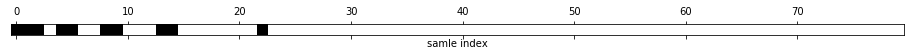

In [56]:
import matplotlib.pyplot as plt
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("samle index")
plt.yticks(())

In [58]:
from sklearn.ensemble import RandomForestClassifier
X_test_selected = select.transform(X_test)

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit (X_train,y_train)
print("Score with all features: {:.3f}".format(model.score(X_test,y_test)))

model.fit (X_train_selected,y_train)
print("Score with selected features: {:.3f}".format(model.score(X_test_selected,y_test)))

Score with all features: 0.773
Score with selected features: 0.987


# Feature Importance

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
model.feature_importances_

array([1.21999395e-02, 4.79411242e-03, 5.48436457e-04, 4.89691243e-03,
       3.89411868e-03, 3.46656771e-03, 0.00000000e+00, 2.58810221e-01,
       1.36101915e-02, 5.90480138e-01, 1.95290190e-03, 0.00000000e+00,
       0.00000000e+00, 7.15810293e-03, 1.62428968e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.33896894e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.28091894e-02, 6.34289192e-03,
       2.19674414e-03, 1.26616488e-02, 4.61686698e-03, 1.10612337e-03,
       2.44449059e-03, 7.68713627e-04, 0.00000000e+00, 1.63200162e-03,
       0.00000000e+00, 1.43207703e-03, 0.00000000e+00, 1.94829256e-03,
       1.46303902e-03, 0.00000000e+00, 4.84734248e-04, 2.89681863e-03,
       1.45612760e-03, 5.25261719e-04, 1.44038065e-03, 1.35048510e-03,
       0.00000000e+00, 2.84591817e-03, 2.87162171e-03, 1.74103941e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

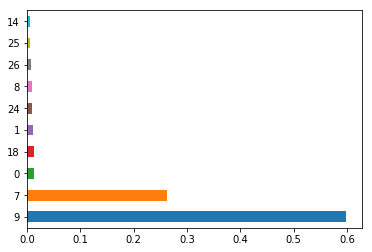

In [62]:
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model-Based Feature Selection

In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold="mean")
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (350L, 80L)
X_train_selected.shape: (350L, 6L)


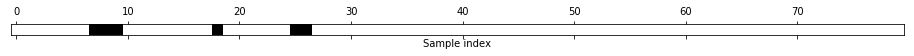

In [67]:
mask = select.get_support()

plt.matshow(mask.reshape(1,-1),cmap="gray_r")
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [87]:
X_test_selected = select.transform(X_test)

model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train,y_train)
print("Score with all features: {:.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Score with selected features: {:.3f}".format(model.score(X_test_selected,y_test)))

Score with all features: 0.773
Score with selected features: 0.913


# Recursive Feature Eleimination

In [88]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=10)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (350L, 80L)
X_train_selected.shape: (350L, 10L)


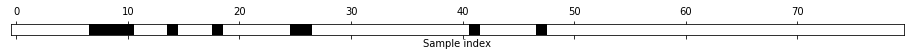

In [89]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [90]:
X_test_selected = select.transform(X_test)

model.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Scoree with selected features: {:,.3f}".format(model.score(X_test_selected,y_test)))

Scoree with all features: 0.773
Scoree with selected features: 0.920
